In [41]:
# Imports
import json
from pandas.io.json import json_normalize
import requests
import pyspark as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from textwrap import wrap

In [200]:
# Methods
def unpack_column(dataFrame,col_name):
    newDf = dataFrame.from_records(dataFrame[col_name].dropna().tolist())
    return newDf

def unpack_and_destroy(dataFrame,column):
    temp = unpack_column(dataFrame,column)
    for col in temp.columns:
        dataFrame[col] = temp[col]
    #dataFrame = dataFrame.drop(columns=[column])
    return dataFrame

def sort_db_value(db,value,asc=False):
    return db.sort_values(by = value, ascending = asc)

def freq_array(freq_list):
    freq = []
    for i in freq_list:
        freq.append(i)
    return freq

def set_labels(freq, ax,horz_shift=.2,vert_shift=1000,w="bold",fsize=10,c="b"):
    for i, v in enumerate(freq):
        ax.text(i-horz_shift,v+vert_shift, str(round(v,2)), weight = w,fontsize=fsize,color = c)
        
def wrap_axis_labels(labels_list,wrap_length=13):
    labels_list = [ '\n'.join(wrap(l, wrap_length)) for l in labels_list]
    return labels_list


In [4]:
# API_url = "https://api.data.charitynavigator.org/v2/Organizations?app_id=4239274b&app_key=c78b1e5cf16a02eaf43992fbb60ce979&pageSize=1000&pageNum=1&rated=true&sort=RATING%3ADESC"
# API_dataFrame = pd.read_json(API_url)

In [5]:
#Unpacking the Dictionaries
for col in API_dataFrame:
    if type(API_dataFrame[col][0]) == dict:
        unpack_and_destroy(API_dataFrame,col)

In [6]:
API_dataFrame.head()

,advisories,category,cause,charityName,charityNavigatorURL,currentRating,donationAddress,ein,irsClassification,mailingAddress,...,nteeType,rulingDate,subsection,city,country,postalCode,stateOrProvince,streetAddress1,streetAddress2,_rapid_links
0,"{'severity': None, 'active': {'_rapid_links': ...","{'categoryName': 'Health', 'categoryID': 5, 'c...","{'causeID': 13, 'causeName': 'Diseases, Disord...",Florida Breast Cancer Foundation,https://www.charitynavigator.org/?bay=search.s...,{'ratingImage': {'small': 'https://d20umu42aun...,NaN,010694045,{'deductibility': 'Contributions are deductibl...,"{'country': None, 'stateOrProvince': 'FL', 'ci...",...,Medical Research,"April, 2003",501(c)(3),North Miami,None,33181,FL,11900 Biscayne Boulevard,Suite 288,{'related': {'href': 'https://api.data.charity...
1,"{'severity': None, 'active': {'_rapid_links': ...","{'categoryName': 'International', 'categoryID'...","{'causeID': 20, 'causeName': 'Development and ...",Haitian Health Foundation,https://www.charitynavigator.org/?bay=search.s...,{'ratingImage': {'small': 'https://d20umu42aun...,NaN,061135999,{'deductibility': 'Contributions are deductibl...,"{'country': None, 'stateOrProvince': 'CT', 'ci...",...,"International, Foreign Affairs and National Se...","December, 1985",501(c)(3),Norwich,None,06360,CT,97 Sherman Street,None,{'related': {'href': 'https://api.data.charity...
2,"{'severity': None, 'active': {'_rapid_links': ...","{'categoryName': 'Animals', 'categoryID': 1, '...","{'causeID': 2, 'causeName': 'Animal Rights, We...",SPCA of Westchester,https://www.charitynavigator.org/?bay=search.s...,{'ratingImage': {'small': 'https://d20umu42aun...,NaN,131740069,{'deductibility': 'Contributions are deductibl...,"{'country': None, 'stateOrProvince': 'NY', 'ci...",...,Animal-Related,"December, 1959",501(c)(3),Briarcliff Manor,None,10510,NY,590 North State Road,None,{'related': {'href': 'https://api.data.charity...
3,"{'severity': None, 'active': {'_rapid_links': ...","{'categoryName': 'Environment', 'categoryID': ...","{'causeID': 11, 'causeName': 'Environmental Pr...",Conservation Foundation of the Gulf Coast,https://www.charitynavigator.org/?bay=search.s...,{'ratingImage': {'small': 'https://d20umu42aun...,NaN,200345249,{'deductibility': 'Contributions are deductibl...,"{'country': None, 'stateOrProvince': 'FL', 'ci...",...,"Environmental Quality, Protection and Beautifi...","December, 2003",501(c)(3),Osprey,None,34229,FL,P.O. Box 902,400 Palmetto Avenue,{'related': {'href': 'https://api.data.charity...
4,"{'severity': None, 'active': {'_rapid_links': ...","{'categoryName': 'Community Development', 'cat...","{'causeID': 42, 'causeName': 'United Ways', 'c...",United Way of Blount County,https://www.charitynavigator.org/?bay=search.s...,{'ratingImage': {'small': 'https://d20umu42aun...,NaN,237122193,{'deductibility': 'Contributions are deductibl...,"{'country': None, 'stateOrProvince': 'TN', 'ci...",...,"Philanthropy, Voluntarism and Grantmaking Foun...","August, 1971",501(c)(3),Maryville,None,37804,TN,1615 E. Broadway Avenue,None,{'related': {'href': 'https://api.data.charity...


In [65]:
#Drop Columns (31)
# API_dataFrame = API_dataFrame.drop(columns=['advisories','category','cause', 'charityNavigatorURL', 'currentRating'])
# API_dataFrame = API_dataFrame.drop(columns=['donationAddress','irsClassification','mailingAddress', 'organization', 'websiteURL'])
# API_dataFrame = API_dataFrame.drop(columns=['active','severity','image', 'rulingDate', 'subsection'])
# API_dataFrame = API_dataFrame.drop(columns=['ratingImage','nteeLetter','nteeSuffix', 'streetAddress2', '_rapid_links'])
# API_dataFrame = API_dataFrame.drop(columns=['accountingPeriod','latest990','nteeCode', 'country'])
# API_dataFrame = API_dataFrame.drop(columns=['affiliation','filingRequirement','groupName', 'foundationStatus'])
# API_dataFrame = API_dataFrame.drop(columns=['deductibilityDetail','exemptOrgStatus','exemptOrgStatusCode'])

API_dataFrame.sort_values(by='rating',ascending=False).head(50)

,charityName,ein,mission,tagLine,categoryID,categoryName,causeID,causeName,rating,assetAmount,classification,deductibility,deductibilityCode,incomeAmount,nteeClassification,nteeType,city,postalCode,stateOrProvince,streetAddress1
0,Florida Breast Cancer Foundation,010694045,Florida Breast Cancer Foundation strives to en...,To end the suffering caused by breast cancer,5,Health,13,"Diseases, Disorders, and Disciplines",4.0,2.221944e+06,Charitable Organization,Contributions are deductible,1,1.662411e+06,Fund Raising and/or Fund Distribution,Medical Research,North Miami,33181,FL,11900 Biscayne Boulevard
648,Samaritan's Purse,581437002,Samaritan's Purse is a nondenominational evang...,International relief,7,International,20,Development and Relief Services,4.0,6.782103e+08,Religious Organization,Contributions are deductible,1,8.854806e+08,Christian,"Religion-Related, Spiritual Development",Boone,28607,NC,P.O. Box 3000
650,Conquer Cancer Foundation of the American Soci...,311667995,Conquering cancer worldwide by funding breakth...,Creating a world free from the fear of cancer,5,Health,14,Medical Research,4.0,6.943405e+07,Charitable Organization,Contributions are deductible,1,4.403910e+07,Single Organization Support,Medical Research,Alexandria,22314,VA,2318 Mill Road
651,United Way of Southwest Michigan,381358411,United Way of Southwest Michigan works to impr...,Live United,10,Community Development,42,United Ways,4.0,8.118257e+06,Charitable Organization,Contributions are deductible,1,6.150225e+06,Fund Raising Organizations That Cross Categories,"Philanthropy, Voluntarism and Grantmaking Foun...",Saint Joseph,49085,MI,2015 Lakeview Avenue
652,Boca Helping Hands,311713631,Boca Helping Hands (BHH) mission is to provide...,Together we can make a difference,6,Human Services,29,Social Services,4.0,6.761700e+06,Charitable Organization,Contributions are deductible,1,6.764049e+06,Congregate Meals,"Food, Agriculture and Nutrition",Boca Raton,33432,FL,1500 NW 1st Court
653,buildOn,223128648,"At home or abroad, buildOn's mission is to bre...","Breaking the cycle of poverty, illiteracy and ...",7,International,20,Development and Relief Services,4.0,1.358512e+07,Charitable Organization,Contributions are deductible,1,2.400419e+07,"International Development, Relief Services","International, Foreign Affairs and National Se...",Stamford,06905,CT,P.O. Box 16741
654,The Lamb Center,412222581,The Lamb Center is a group of caring and deter...,"Serving the poor and homeless, transforming li...",6,Human Services,28,Homeless Services,4.0,5.267610e+06,Charitable Organization,Contributions are deductible,1,1.849329e+06,Pollution Abatement and Control Services,"Environmental Quality, Protection and Beautifi...",Fairfax,22031,VA,3160 Campbell Drive
655,Habitat for Humanity of Greater Dayton,311104456,Habitat for Humanity of Greater Dayton (OH) ha...,Through Shelter We Empower,10,Community Development,27,Housing and Neighborhood Development,4.0,5.586265e+06,Charitable Organization,Contributions are deductible,1,2.803760e+06,None,None,Dayton,45405,OH,115 West Riverview Avenue
656,Alliance for Justice,521009973,Alliance for Justice (AFJ) is a national assoc...,Fighting for a fair America,8,Human and Civil Rights,21,Advocacy and Education,4.0,9.351053e+06,Educational Organization,Contributions are deductible,1,1.592475e+07,Alliance/Advocacy Organizations,"Civil Rights, Social Action, Advocacy",Washington,20036,DC,"11 Dupont Circle, NW"
657,Omaha Symphony,476039304,"Founded in 1921, the Omaha Symphony presents m...",An essential Midwestern resource for excellent...,2,"Arts, Culture, Humanities",4,Performing Arts,4.0,3.668778e+07,Educational Organization,Contributions are deductible,1,1.409025e+07,Symphony Orchestras,"Arts, Culture and Humanities",Omaha,68102,NE,1905 Harney Street


In [11]:
API_dataFrame.shape

(1000, 20)

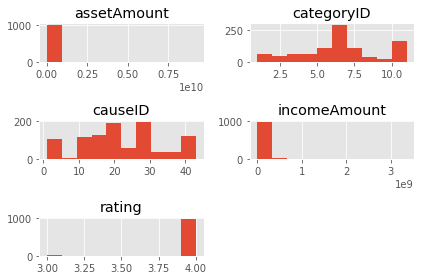

In [13]:
API_dataFrame.hist()
plt.tight_layout()

In [15]:
API_dataFrame.groupby('categoryName').size()

categoryName
Animals                        66
Arts, Culture, Humanities      52
Community Development         156
Education                      69
Environment                    62
Health                        114
Human Services                290
Human and Civil Rights         43
International                 109
Religion                       26
Research and Public Policy     13
dtype: int64

In [66]:
Four_Star_Charities = API_dataFrame[API_dataFrame['rating'] == 4.0]
Four_Star_Charities.shape

(982, 20)

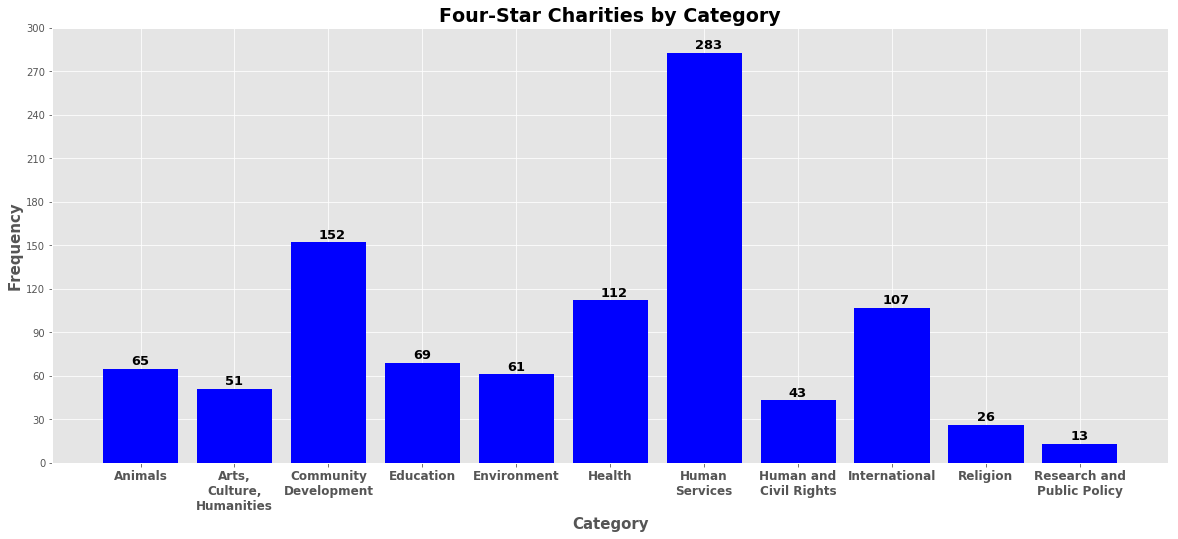

In [75]:
# Charity Count Bar Graph 1
category_count = Four_Star_Charities.groupby('categoryName').size()
categories = list(category_count.index.values)
categories = wrap_axis_labels(categories,13)

freq = freq_array(category_count)
    
fig,ax = plt.subplots(figsize = (20,8))
ax.bar(categories,freq, color = "b");
ax.set_xticklabels(categories, rotation=0, weight = "bold",fontsize=12)

# Needs Adjustment based on Data
ax.set_yticks(np.arange(0,np.max(freq)+18,30)) ;
ax.set_title("Four-Star Charities by Category", weight = "bold",fontsize=19);
ax.set_xlabel("Category", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

set_labels(freq,ax,.1,(np.max(freq)/100),fsize=13)
    

In [78]:
mask = API_dataFrame[API_dataFrame["city"]=="Miami"]

In [79]:
mask

,charityName,ein,mission,tagLine,categoryID,categoryName,causeID,causeName,rating,assetAmount,classification,deductibility,deductibilityCode,incomeAmount,nteeClassification,nteeType,city,postalCode,stateOrProvince,streetAddress1
202,Miami Lighthouse for the Blind and Visually Im...,590637847,"Established in 1931, Miami Lighthouse for the ...","Providing hope, confidence and independence",6,Human Services,29,Social Services,4.0,33844567.0,Charitable Organization,Contributions are deductible,1,16592436.0,"Blind/Visually Impaired Centers, Services",Human Services - Multipurpose and Other,Miami,33130,FL,601 Southwest Eighth Avenue
271,American Nicaraguan Foundation,650326517,The American Nicaraguan Foundation (ANF) was f...,"Providing education, health, food and housing ...",7,International,30,Humanitarian Relief Supplies,4.0,27048438.0,Charitable Organization,Contributions are deductible,1,112008723.0,"International Development, Relief Services","International, Foreign Affairs and National Se...",Miami,33126,FL,1000 NW 57 CT
334,Greater Miami Jewish Federation,590624404,"Founded in 1938, the Greater Miami Jewish Fede...",Touching Jewish lives. Building Jewish community.,10,Community Development,43,Jewish Federations,4.0,334094714.0,Charitable Organization,Contributions are deductible,1,70890346.0,Fund Raising Organizations That Cross Categories,"Philanthropy, Voluntarism and Grantmaking Foun...",Miami,33137,FL,4200 Biscayne Boulevard
368,Chapman Partnership,650425069,"Since 1995, Chapman Partnership, formerly Comm...",Empowering the Homeless,6,Human Services,28,Homeless Services,4.0,69185042.0,Charitable Organization,Contributions are deductible,1,18648084.0,"Homeless Persons Centers, Services",Human Services - Multipurpose and Other,Miami,33136,FL,1550 North Miami Avenue


In [80]:
API_url_2 = "https://api.data.charitynavigator.org/v2/Organizations?app_id=4239274b&app_key=c78b1e5cf16a02eaf43992fbb60ce979&pageSize=1000&pageNum=2&rated=true&sort=RATING%3ADESC"
API_dataFrame_2 = pd.read_json(API_url_2)

In [81]:
#Unpacking the Dictionaries
for col in API_dataFrame_2:
    if type(API_dataFrame_2[col][0]) == dict:
        unpack_and_destroy(API_dataFrame_2,col)

In [84]:
#Drop Columns (31)
# API_dataFrame_2 = API_dataFrame_2.drop(columns=['advisories','category','cause', 'charityNavigatorURL', 'currentRating'])
# API_dataFrame_2 = API_dataFrame_2.drop(columns=['donationAddress','irsClassification','mailingAddress', 'organization', 'websiteURL'])
# API_dataFrame_2 = API_dataFrame_2.drop(columns=['active','severity','image', 'rulingDate', 'subsection'])
# API_dataFrame_2 = API_dataFrame_2.drop(columns=['ratingImage','nteeLetter','nteeSuffix', 'streetAddress2', '_rapid_links'])
# API_dataFrame_2 = API_dataFrame_2.drop(columns=['accountingPeriod','latest990','nteeCode', 'country'])
# API_dataFrame_2 = API_dataFrame_2.drop(columns=['affiliation','filingRequirement','groupName', 'foundationStatus'])
# API_dataFrame_2 = API_dataFrame_2.drop(columns=['deductibilityDetail','exemptOrgStatus','exemptOrgStatusCode'])

API_dataFrame_2.sort_values(by='rating',ascending=True).head(50)

,charityName,ein,mission,tagLine,categoryID,categoryName,causeID,causeName,rating,assetAmount,classification,deductibility,deductibilityCode,incomeAmount,nteeClassification,nteeType,city,postalCode,stateOrProvince,streetAddress1
72,Community Servings,223154028,Community Servings is dedicated to providing f...,Food Heals,6,Human Services,29,Social Services,3.0,11750020.0,Charitable Organization,Contributions are deductible,1,12153548.0,Services to Promote the Independence of Specif...,Human Services - Multipurpose and Other,Jamaica Plain,02130,MA,18 Marbury Terrace
362,Treasure Coast Food Bank,650123281,Treasure Coast Food Bank (TCFB) was founded in...,Together we can solve hunger,6,Human Services,18,"Food Banks, Food Pantries, and Food Distribution",3.0,8210950.0,Charitable Organization,Contributions are deductible,1,22266018.0,"Food Banks, Food Pantries","Food, Agriculture and Nutrition",Fort Pierce,34947,FL,401 Angle Road
540,Theatre for a New Audience,133059081,The mission of Theatre for a New Audience (TFA...,Discover the contemporary heart of the classics,2,"Arts, Culture, Humanities",4,Performing Arts,3.0,20319432.0,Educational Organization,Contributions are deductible,1,12598448.0,Theater,"Arts, Culture and Humanities",New York,10014,NY,154 Christopher Street
33,Friends of Israel Disabled Veterans – Beit Hal...,133392711,Friends of Israel Disabled Veterans (FIDV) and...,Serving those who have sacrificed for Israel.,7,International,19,"International Peace, Security, and Affairs",3.0,5538063.0,Charitable Organization,Contributions are deductible,1,5628572.0,Fund Raising and/or Fund Distribution,"International, Foreign Affairs and National Se...",New York,10010,NY,1133 Broadway
34,Hereditary Disease Foundation,237376197,The Hereditary Disease Foundation is committed...,"Innovating research, discovering cures.",5,Health,14,Medical Research,3.0,10922906.0,Charitable Organization,Contributions are deductible,1,3809941.0,"Birth Defects, Genetic Diseases Research",Medical Research,New York,10032,NY,601 West 168th Street
711,North Carolina Veterinary Medical Foundation,581344473,Created in 1978 to attract funding for the Col...,Providing financial support for education and ...,1,Animals,2,"Animal Rights, Welfare, and Services",3.0,84777245.0,Charitable Organization,Contributions are deductible,1,7310167.0,Single Organization Support,Educational Institutions and Related Activities,Raleigh,27607,NC,1060 William Moore Drive
472,Far East Broadcasting Company,951461574,"Founded in 1945, Far East Broadcasting Company...",Christ to the world by radio,9,Religion,25,Religious Media and Broadcasting,3.0,15835069.0,Religious Organization,Contributions are deductible,1,17128111.0,Religious Radio,"Religion-Related, Spiritual Development",La Mirada,90638,CA,15700 Imperial Highway
887,Center for Asian American Media,942801493,Founded in 1980 the Center for Asian American ...,Presenting stories that convey the richness an...,2,"Arts, Culture, Humanities",5,Public Broadcasting and Media,3.0,3991564.0,Charitable Organization,Contributions are deductible,1,2744800.0,"Media, Communications Organizations","Arts, Culture and Humanities",San Francisco,94103,CA,145 Ninth Street
405,LA Promise Fund,204562686,PREPARING LOS ANGELES STUDENTS FOR SUCCESS IN ...,Empowering students. Strengthening families. B...,3,Education,40,Youth Education Programs and Services,3.0,3847636.0,Charitable Organization,Contributions are deductible,1,8199923.0,"Scholarships, Student Financial Aid Services, ...",Educational Institutions and Related Activities,Los Angeles,90012,CA,202 West 1st Street
889,Ohio Environmental Council,310805578,The Ohio Environmental Council is the leading ...,Unleashing the power of green,4,Environment,11,Environmental Protection and Conservation,3.0,1194812.0,Educational Organization,Contributions are deductible,1,2492542.0,Alliance/Advocacy Organizations,"Environmental Quality, Protection and Beautifi...",Columbus,43212,OH,1145 Chesapeake Ave


In [85]:
Four_Star_Charities_2 = API_dataFrame_2[API_dataFrame_2['rating'] == 4.0]
Four_Star_Charities_2.shape

(952, 20)

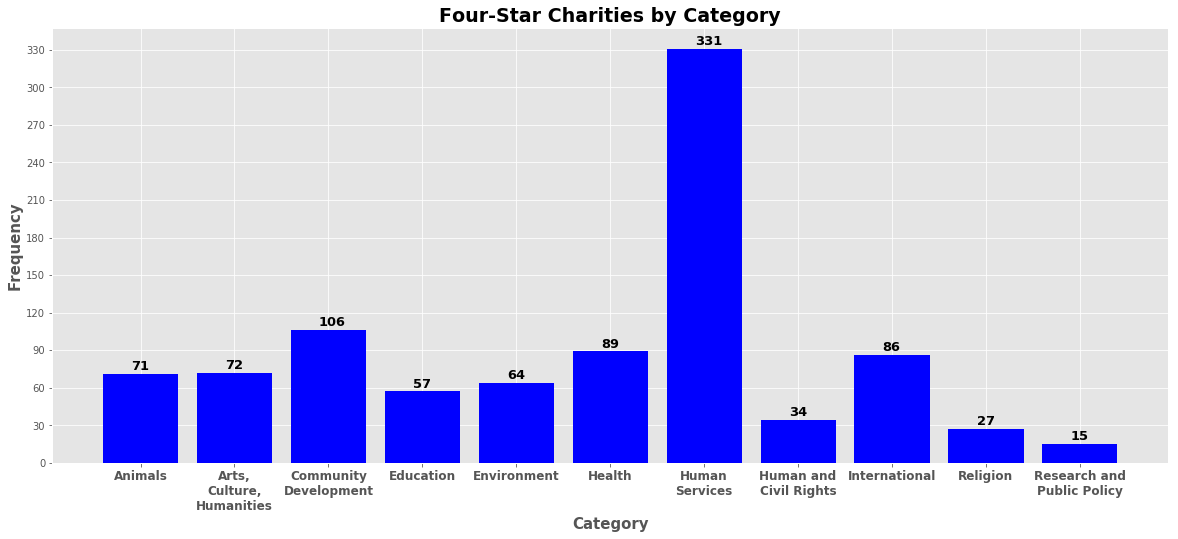

In [86]:
# Charity Count Bar Graph 2
category_count = Four_Star_Charities_2.groupby('categoryName').size()
categories = list(category_count.index.values)
categories = wrap_axis_labels(categories,13)

freq = freq_array(category_count)
    
fig,ax = plt.subplots(figsize = (20,8))
ax.bar(categories,freq, color = "b");
ax.set_xticklabels(categories, rotation=0, weight = "bold",fontsize=12)

# Needs Adjustment based on Data
ax.set_yticks(np.arange(0,np.max(freq)+18,30)) ;
ax.set_title("Four-Star Charities by Category", weight = "bold",fontsize=19);
ax.set_xlabel("Category", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

set_labels(freq,ax,.1,(np.max(freq)/100),fsize=13)

In [87]:
concat_df = pd.concat([API_dataFrame,API_dataFrame_2])

In [89]:
concat_df.shape

(2000, 20)

In [97]:
len(list(set(concat_df['ein'])))

2000

In [99]:
API_url_3 = "https://api.data.charitynavigator.org/v2/Organizations?app_id=4239274b&app_key=c78b1e5cf16a02eaf43992fbb60ce979&pageSize=1000&pageNum=3&rated=true&sort=RATING%3ADESC"
API_dataFrame_3 = pd.read_json(API_url_3)
API_dataFrame_3.shape

(1000, 14)

In [110]:

# for i in range(10,12):
#     print(1)
#     API_url = "https://api.data.charitynavigator.org/v2/Organizations?app_id=4239274b&app_key=c78b1e5cf16a02eaf43992fbb60ce979&pageSize=1000&pageNum="+str(i)+"&rated=true&sort=RATING%3ADESC"
#     API_df = pd.read_json(API_url)
#     print(2)
#     #Unpacking the Dictionaries
#     for col in API_df:
#         if type(API_df[col][0]) == dict:
#             unpack_and_destroy(API_df,col)
#     print(3)
#     #Drop Columns (31)
#     API_df = API_df.drop(columns=['advisories','category','cause', 'charityNavigatorURL', 'currentRating'])
#     API_df = API_df.drop(columns=['donationAddress','irsClassification','mailingAddress', 'organization', 'websiteURL'])
#     API_df = API_df.drop(columns=['active','severity','image', 'rulingDate', 'subsection'])
#     API_df = API_df.drop(columns=['ratingImage','nteeLetter','nteeSuffix', 'streetAddress2', '_rapid_links'])
#     API_df = API_df.drop(columns=['accountingPeriod','latest990','nteeCode', 'country'])
#     API_df = API_df.drop(columns=['affiliation','filingRequirement','groupName', 'foundationStatus'])
#     API_df = API_df.drop(columns=['deductibilityDetail','exemptOrgStatus','exemptOrgStatusCode'])
#     print(4)
#     concat_df = pd.concat([concat_df,API_df])

In [108]:
concat_df.shape

(8646, 20)

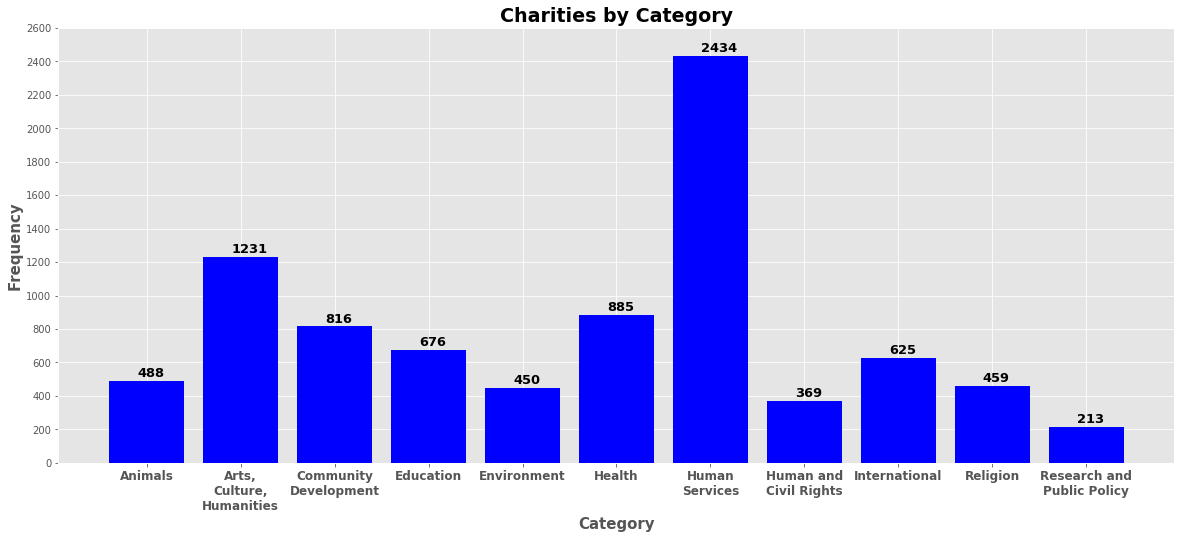

In [119]:
# Charity Count Bar Graph Total
category_count = concat_df.groupby('categoryName').size()
categories = list(category_count.index.values)
categories = wrap_axis_labels(categories,13)

freq = freq_array(category_count)
    
fig,ax = plt.subplots(figsize = (20,8))
ax.bar(categories,freq, color = "b");
ax.set_xticklabels(categories, rotation=0, weight = "bold",fontsize=12)

# Needs Adjustment based on Data
ax.set_yticks(np.arange(0,np.max(freq)+200,200)) ;
ax.set_title("Charities by Category", weight = "bold",fontsize=19);
ax.set_xlabel("Category", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

set_labels(freq,ax,.1,(np.max(freq)/100),fsize=13)

In [120]:
Four_Star_Charities_Total = concat_df[concat_df['rating'] == 4.0]
Four_Star_Charities_Total.shape

(3440, 20)

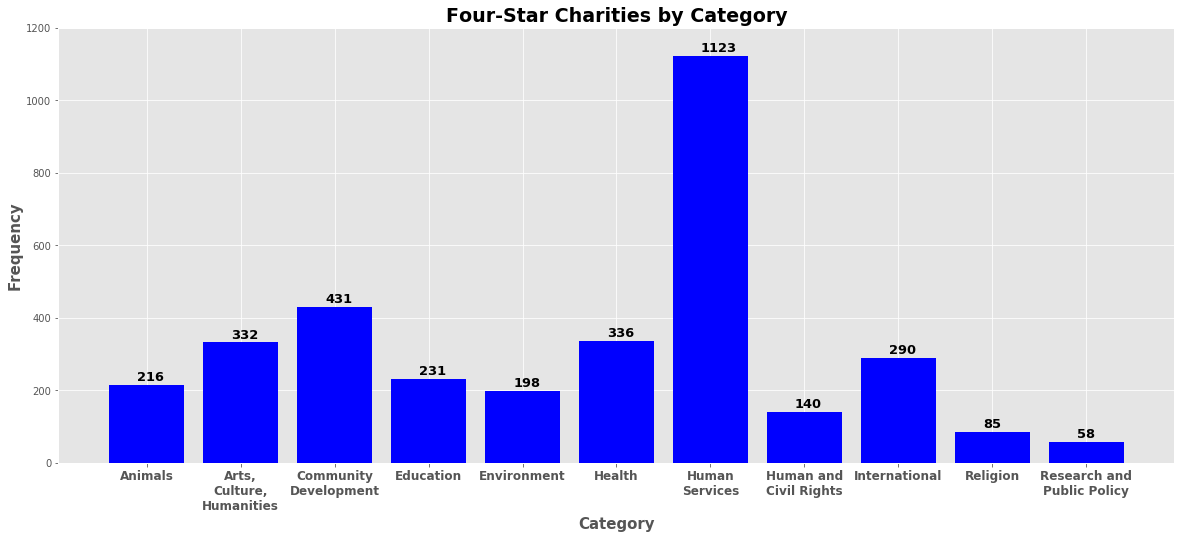

In [122]:
# Charity Count Bar Graph 4-Star
category_count = Four_Star_Charities_Total.groupby('categoryName').size()
categories = list(category_count.index.values)
categories = wrap_axis_labels(categories,13)

freq = freq_array(category_count)
    
fig,ax = plt.subplots(figsize = (20,8))
ax.bar(categories,freq, color = "b");
ax.set_xticklabels(categories, rotation=0, weight = "bold",fontsize=12)

# Needs Adjustment based on Data
ax.set_yticks(np.arange(0,np.max(freq)+200,200)) ;
ax.set_title("Four-Star Charities by Category", weight = "bold",fontsize=19);
ax.set_xlabel("Category", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

set_labels(freq,ax,.1,(np.max(freq)/100),fsize=13)

In [123]:
Three_Star_Charities_Total = concat_df[concat_df['rating'] == 3.0]
Three_Star_Charities_Total.shape

(3828, 20)

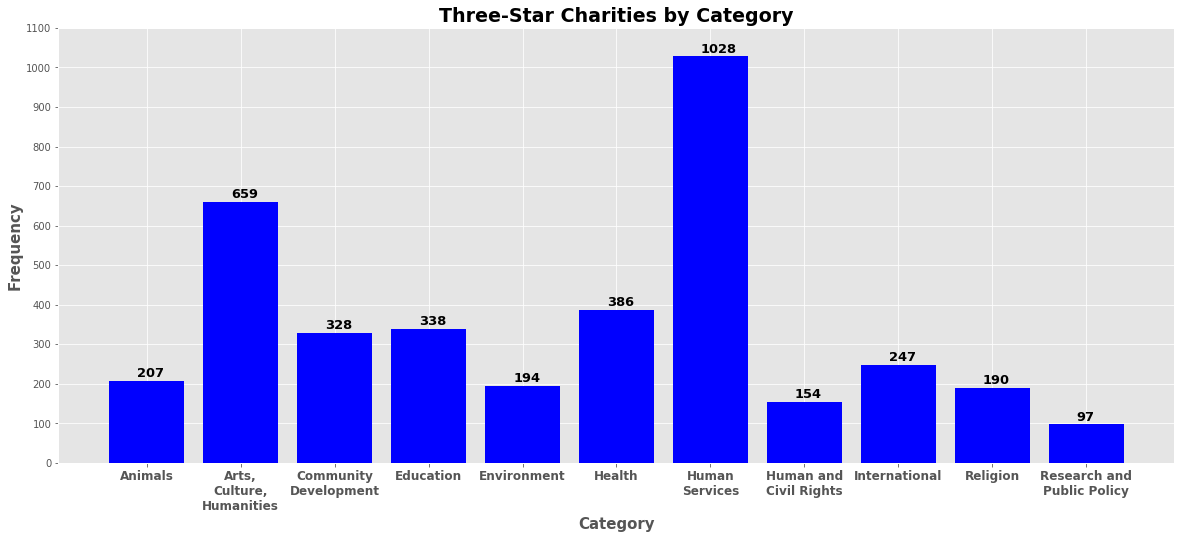

In [136]:
# Charity Count Bar Graph 3-Star
category_count = Three_Star_Charities_Total.groupby('categoryName').size()
categories = list(category_count.index.values)
categories = wrap_axis_labels(categories,13)

freq = freq_array(category_count)
    
fig,ax = plt.subplots(figsize = (20,8))
ax.bar(categories,freq, color = "b");
ax.set_xticklabels(categories, rotation=0, weight = "bold",fontsize=12)

# Needs Adjustment based on Data
ax.set_yticks(np.arange(0,np.max(freq)+100,100)) ;
ax.set_title("Three-Star Charities by Category", weight = "bold",fontsize=19);
ax.set_xlabel("Category", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

set_labels(freq,ax,.1,(np.max(freq)/100),fsize=13)

In [132]:
Two_Star_Charities_Total = concat_df[concat_df['rating'] == 2]
Two_Star_Charities_Total.shape

(1054, 20)

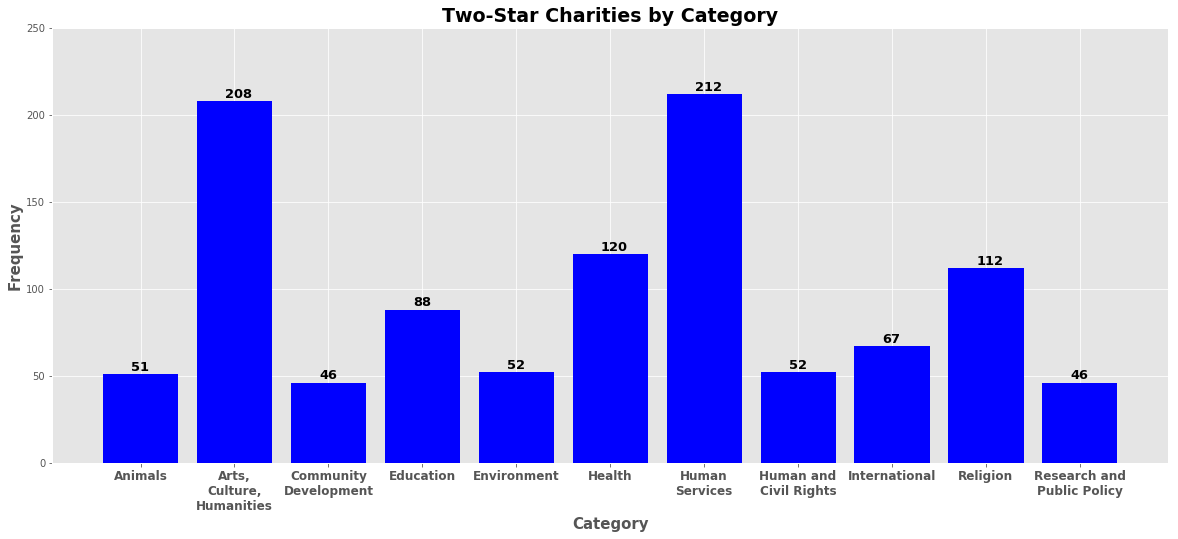

In [135]:
# Charity Count Bar Graph 2-Star
category_count = Two_Star_Charities_Total.groupby('categoryName').size()
categories = list(category_count.index.values)
categories = wrap_axis_labels(categories,13)

freq = freq_array(category_count)
    
fig,ax = plt.subplots(figsize = (20,8))
ax.bar(categories,freq, color = "b");
ax.set_xticklabels(categories, rotation=0, weight = "bold",fontsize=12)

# Needs Adjustment based on Data
ax.set_yticks(np.arange(0,np.max(freq)+50,50)) ;
ax.set_title("Two-Star Charities by Category", weight = "bold",fontsize=19);
ax.set_xlabel("Category", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

set_labels(freq,ax,.1,(np.max(freq)/100),fsize=13)

In [146]:
One_Star_Charities_Total = concat_df[concat_df['rating'] == 1]
One_Star_Charities_Total.shape

(248, 20)

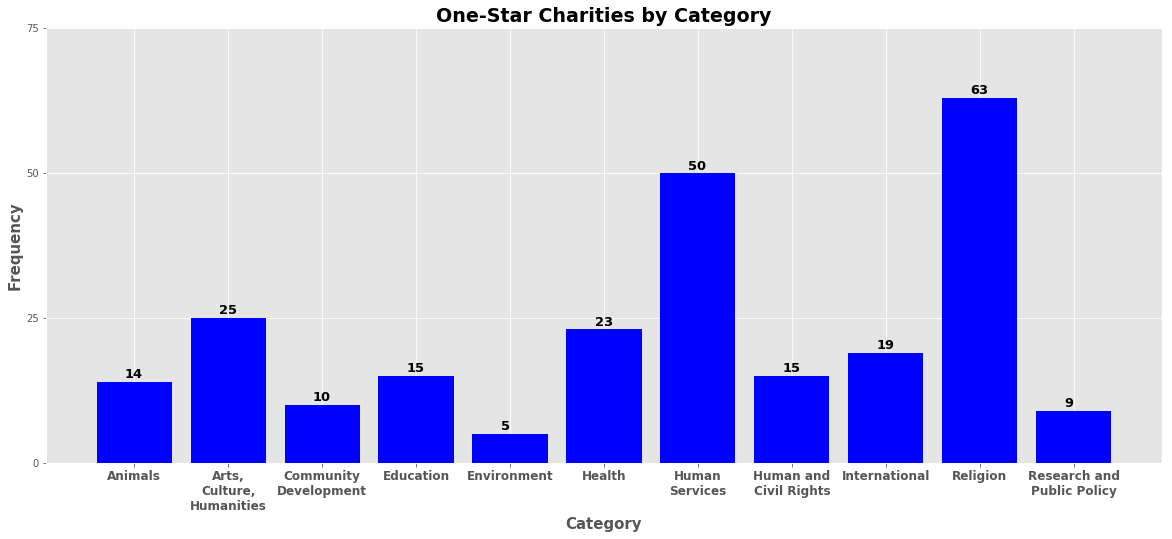

In [148]:
# Charity Count Bar Graph 1-Star
category_count = One_Star_Charities_Total.groupby('categoryName').size()
categories = list(category_count.index.values)
categories = wrap_axis_labels(categories,13)

freq = freq_array(category_count)
    
fig,ax = plt.subplots(figsize = (20,8))
ax.bar(categories,freq, color = "b");
ax.set_xticklabels(categories, rotation=0, weight = "bold",fontsize=12)

# Needs Adjustment based on Data
ax.set_yticks(np.arange(0,np.max(freq)+25,25)) ;
ax.set_title("One-Star Charities by Category", weight = "bold",fontsize=19);
ax.set_xlabel("Category", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

set_labels(freq,ax,.1,(np.max(freq)/100),fsize=13)

In [149]:
Zero_Star_Charities_Total = concat_df[concat_df['rating'] == 0]
Zero_Star_Charities_Total.shape

(53, 20)

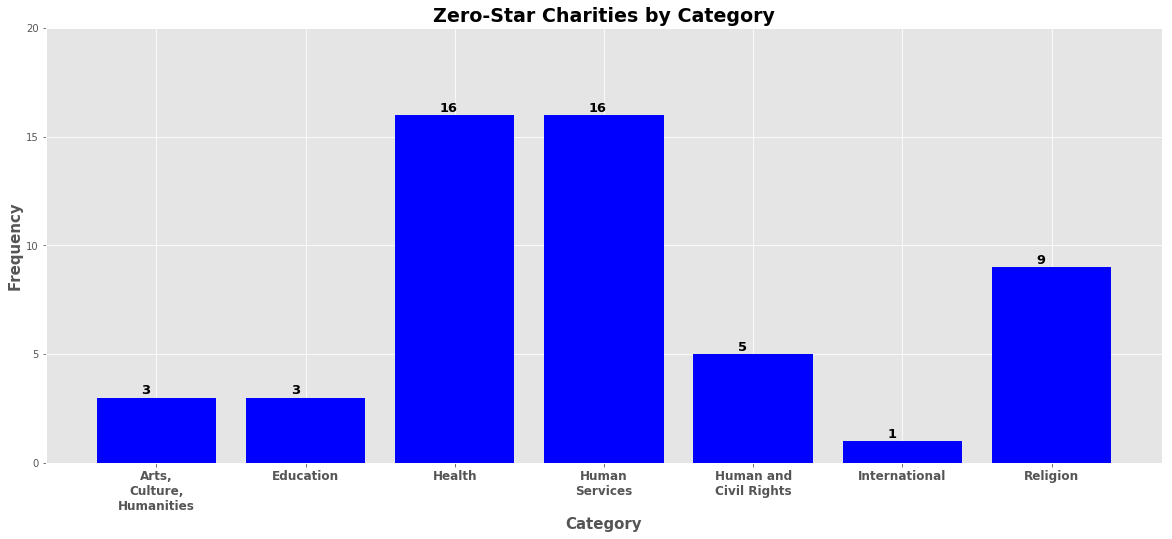

In [155]:
# Charity Count Bar Graph 1-Star
category_count = Zero_Star_Charities_Total.groupby('categoryName').size()
categories = list(category_count.index.values)
categories = wrap_axis_labels(categories,13)

freq = freq_array(category_count)
    
fig,ax = plt.subplots(figsize = (20,8))
ax.bar(categories,freq, color = "b");
ax.set_xticklabels(categories, rotation=0, weight = "bold",fontsize=12)

# Needs Adjustment based on Data
ax.set_yticks(np.arange(0,np.max(freq)+5,5)) ;
ax.set_title("Zero-Star Charities by Category", weight = "bold",fontsize=19);
ax.set_xlabel("Category", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

set_labels(freq,ax,.1,(np.max(freq)/100),fsize=13)

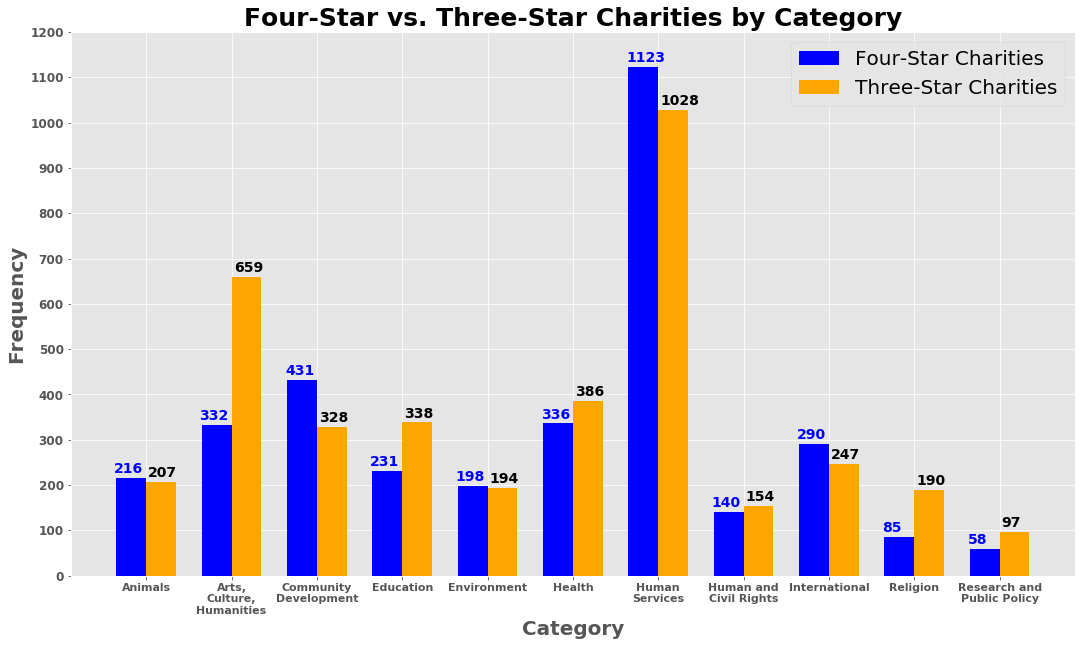

In [233]:
# 4 vs. 3 -Star Charities Count Bar Graph
#Four-Star
four_star_count = Four_Star_Charities_Total.groupby("categoryName").size()
categories = list(four_star_count.index.values)
categories = wrap_axis_labels(categories,13)

ind = np.arange(len(categories)) 

freq = freq_array(four_star_count)
    
fig,ax = plt.subplots(figsize = (18,10),sharex=True,sharey=True)
ax.bar(ind,freq, color = "b",width=0.35,label="Four-Star Charities");

# Needs Adjustment based on Data

ax.set_yticklabels(np.arange(0,np.max(freq)+200,100), weight="bold", fontsize =12) ;
ax.set_title("Four-Star vs. Three-Star Charities by Category", weight = "bold",fontsize=25);
ax.set_xlabel("Category", fontsize=20, weight = "bold");
ax.set_ylabel("Frequency", fontsize=20, weight = "bold");

set_labels(freq,ax,.2,(np.max(freq)/100),fsize=14,c="blue")
    
#Three-Star
three_star_count = Three_Star_Charities_Total.groupby("categoryName").size()
categories_2 = list(three_star_count.index.values)

ind_2 = np.arange(len(categories_2)) 

freq_2 = freq_array(three_star_count)
    
ax.bar(ind_2+.35,freq_2, color = "orange",width=0.35,label="Three-Star Charities");

# Needs Adjustment based on Data
# ax.set_yticks(np.arange(0,np.max(freq)+200,200)) ;
# ax.set_title("Four-Star Charities by Category", weight = "bold",fontsize=19);
# ax.set_xlabel("Category", fontsize=15, weight = "bold");
# ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

set_labels(freq_2,ax,-.2,(np.max(freq)/100),fsize=14,c='black')

ax.set_yticks(np.arange(0,(np.max(freq)+100),100)) ;
ax.set_xticks(ind + .35 / 2)
ax.set_xticklabels(categories, weight="bold",fontsize=11);
ax.legend(prop={'size': 20});

# plt.savefig("Four_Star_vs_Three_Star_Categories")